# LSTM을 수행하기위해서 기존 데이터 형식 맞추기

In [1]:
# 환경변수 불러오기
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
# 경로 설정
file_path = os.getenv('FILE_PATH')
save_path = os.getenv('SAVE_PATH')

In [4]:
try:
    df = pd.read_csv(file_path+'lstm_data/4.정읍수도_순시유량.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path+'lstm_data/4.정읍수도_순시유량.csv', encoding='cp949')
    except Exception as e:
        print(f"Error: {e}")

In [5]:
df

,저장시간,장명(배) 유입유량 순시,장명(배) 유출유량 순시(통신),장명 1블록 유량,장명 2블록 유량,장명 3블록 유량(통신),장명 4블록 유량(통신),장명 5블록 유량 순시,장명 6블록 유량 순시,상동(가) 순시유량(통신),회룡(가) 유입유량 순시,회룡(가) 유량순시(통신),노인복지(가) 유량,내장(배) 유입유량 순시,내장(배) 유출유량 순시
0,2020/01/01 0:00,224,253,11.94,10.82,48.1,40.6,30,12,105,94,-0.2,3,0,24
1,2020/01/01 0:01,224,245,13.32,10.09,42.5,40.4,31,10,105,93,-0.2,3,0,22
2,2020/01/01 0:02,225,243,12.97,8.66,42.2,37.4,33,12,105,93,-0.2,3,0,19
3,2020/01/01 0:03,224,242,13.42,7.45,38.4,42.6,33,11,105,94,-0.2,3,0,21
4,2020/01/01 0:04,225,263,16.47,11.02,46.4,45.0,35,11,105,94,-0.2,3,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527036,2020/12/31 23:56,378,323,11.47,9.08,107.1,35.4,83,29,102,86,81.4,7,83,21
527037,2020/12/31 23:57,378,324,14.00,9.44,109.0,36.3,83,31,103,89,81.5,5,83,19
527038,2020/12/31 23:58,378,333,11.31,11.24,112.7,32.2,83,32,103,89,81.7,6,83,18
527039,2020/12/31 23:59,378,258,9.86,11.79,31.4,28.4,84,31,101,89,81.3,6,83,15


## sample.csv의 형식

time,JM1_p   
2020-01-01 0:00,4.21   
2020-01-01 0:01,4.2   
2020-01-01 0:02,4.21   

## 장명(배) 유입유량 순시 확인

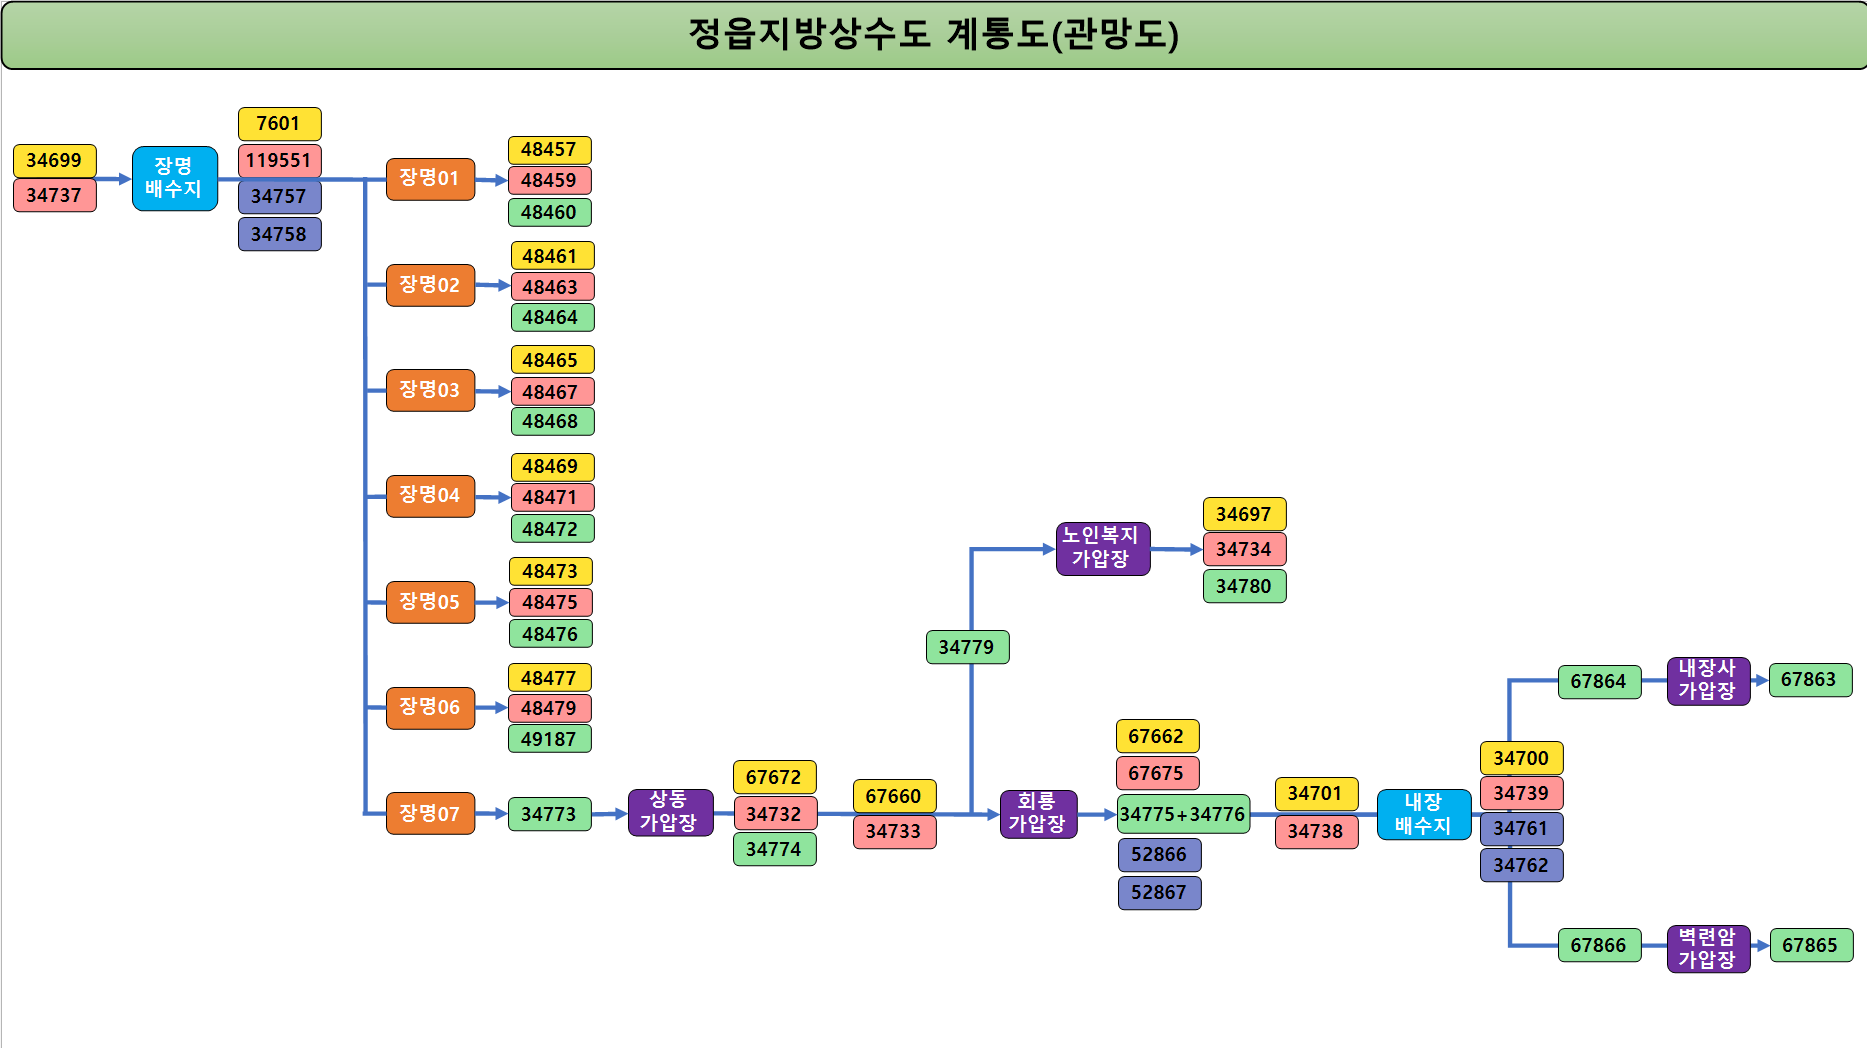
그림을 확인해보면 장명배수지를 통해서 장명01, 02와 같은 블록으로 이동하므로 LSTM모델 작동 테스트에서는 "장명(배) 유입유량 순시"열을 확인

In [6]:
jangmyeong = df[['저장시간','장명(배) 유입유량 순시']]

In [7]:
jangmyeong

,저장시간,장명(배) 유입유량 순시
0,2020/01/01 0:00,224
1,2020/01/01 0:01,224
2,2020/01/01 0:02,225
3,2020/01/01 0:03,224
4,2020/01/01 0:04,225
...,...,...
527036,2020/12/31 23:56,378
527037,2020/12/31 23:57,378
527038,2020/12/31 23:58,378
527039,2020/12/31 23:59,378


In [8]:
# 분석을 위한 데이터셋 저장
jangmyeong.to_csv(save_path+"LSTM_pipeline/Input/jangmyeong.csv",index=False)

# 분석 결과

### Time
- 527041행 약 30초 정도 소요

### Result
- 이상치 x 
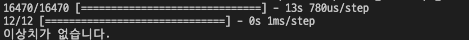 


### Code 
- 기본값으로 실행하는 코드   
    1. python 1_Preprocessing_tool.py -f ./Input/jangmyeong.csv -p
    2. python 2_Learning_LSTM.py -l 
    3. python 3_Prediction.py -f ./Input/jangmyeong.csv -a


